In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
pd.set_option("display.precision", 4)

In [2]:
# reading dataframe
df = pd.read_csv("/Users/joanna/Downloads/STAT 170B/CheckinRank/machine_learning/data/statistical.csv")
df.head(10)

,longitude,latitude,zipcode,population,day,time,checkinNum,review_count,restaurant_count,income
0,-82.7333,28.2173,34652,72441,1,3.0,0.0,24,90,69551
1,-82.7333,28.2173,34652,72441,1,8.5,0.0,24,90,69551
2,-82.7333,28.2173,34652,72441,1,12.0,0.0,24,90,69551
3,-82.7333,28.2173,34652,72441,1,15.5,0.0,24,90,69551
4,-82.7333,28.2173,34652,72441,1,19.0,0.0,24,90,69551
5,-82.7333,28.2173,34652,72441,1,22.0,0.0,24,90,69551
6,-82.7333,28.2173,34652,72441,2,3.0,0.0,24,90,69551
7,-82.7333,28.2173,34652,72441,2,8.5,0.0,24,90,69551
8,-82.7333,28.2173,34652,72441,2,12.0,0.0,24,90,69551
9,-82.7333,28.2173,34652,72441,2,15.5,0.0,24,90,69551


In [3]:
new_df = df.drop(["longitude", "latitude", "zipcode", "day", "time"], axis=1)
new_df.head(10)

,population,checkinNum,review_count,restaurant_count,income
0,72441,0.0,24,90,69551
1,72441,0.0,24,90,69551
2,72441,0.0,24,90,69551
3,72441,0.0,24,90,69551
4,72441,0.0,24,90,69551
5,72441,0.0,24,90,69551
6,72441,0.0,24,90,69551
7,72441,0.0,24,90,69551
8,72441,0.0,24,90,69551
9,72441,0.0,24,90,69551


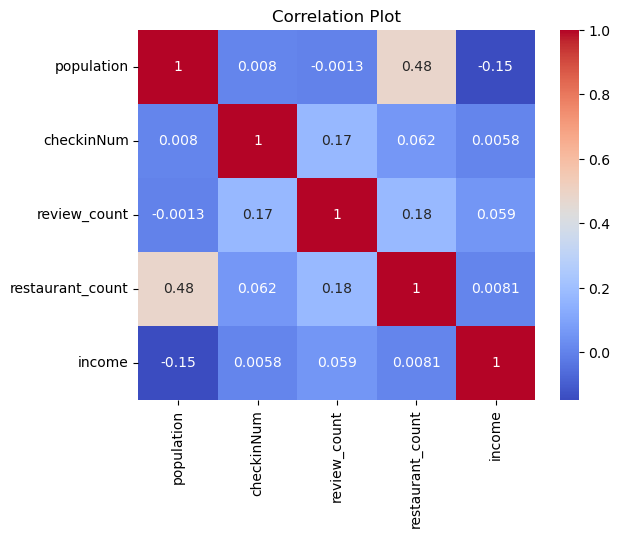

In [4]:
# Calculate the correlation matrix
corr_matrix = new_df.corr()

# Plot the correlation matrix as a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Plot')
plt.show()

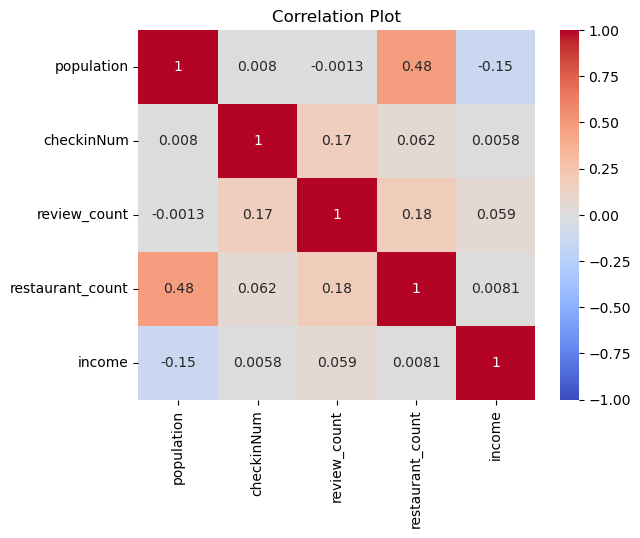

In [5]:
# Calculate the correlation matrix
corr_matrix = new_df.corr()

# Plot the correlation matrix as a heatmap
#sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Plot')
plt.show()

In [6]:
# reading dataframe
df = pd.read_csv("/Users/joanna/Downloads/STAT 170B/top_100_tokens.csv")
df.head(30)

,token,count
0,food,12345
1,##s,8974
2,good,8546
3,great,7762
4,place,6807
5,service,5775
6,like,4377
7,one,4098
8,back,3995
9,time,3974


In [7]:
tokensDict = {}

for index, row in df.iterrows():
    token = row["token"]
    count = row["count"]
    tokensDict[token] = count
    if len(tokensDict) == 15:
        break 

print(tokensDict, '\n')
print([i for i in tokensDict.keys()])

{'food': 12345, '##s': 8974, 'good': 8546, 'great': 7762, 'place': 6807, 'service': 5775, 'like': 4377, 'one': 4098, 'back': 3995, 'time': 3974, 'delicious': 3848, '##y': 3740, 'go': 3725, 'chicken': 3723, 'really': 3695} 

['food', '##s', 'good', 'great', 'place', 'service', 'like', 'one', 'back', 'time', 'delicious', '##y', 'go', 'chicken', 'really']


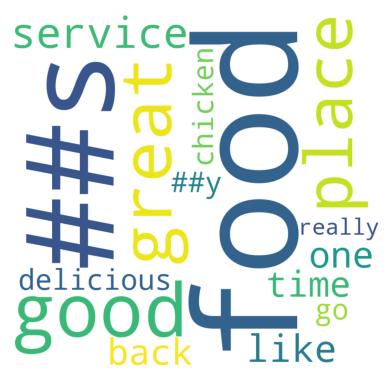

In [8]:
from wordcloud import WordCloud

# create a WordCloud object
wordcloud = WordCloud(width=800, height=800, background_color="white").generate_from_frequencies(tokensDict)

# display the generated wordcloud using matplotlib
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

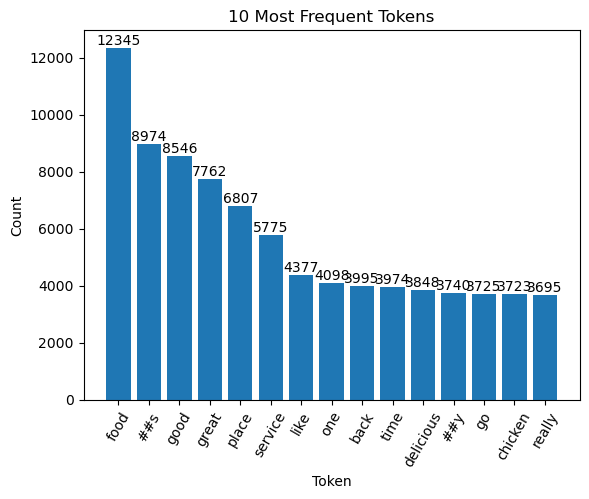

In [9]:
# Create a bar graph
plt.bar(tokensDict.keys(), tokensDict.values())
plt.xticks(rotation=60)
plt.xlabel('Token')
plt.ylabel('Count')
plt.title('10 Most Frequent Tokens')

# Add labels to each bar
for i, count in enumerate(tokensDict.values()):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

{'food': 12345, '##s': 8974, 'good': 8546, 'great': 7762, 'place': 6807, 'service': 5775, 'like': 4377, 'one': 4098, 'back': 3995, 'time': 3974, 'delicious': 3848, '##y': 3740, 'go': 3725, 'chicken': 3723, 'really': 3695}


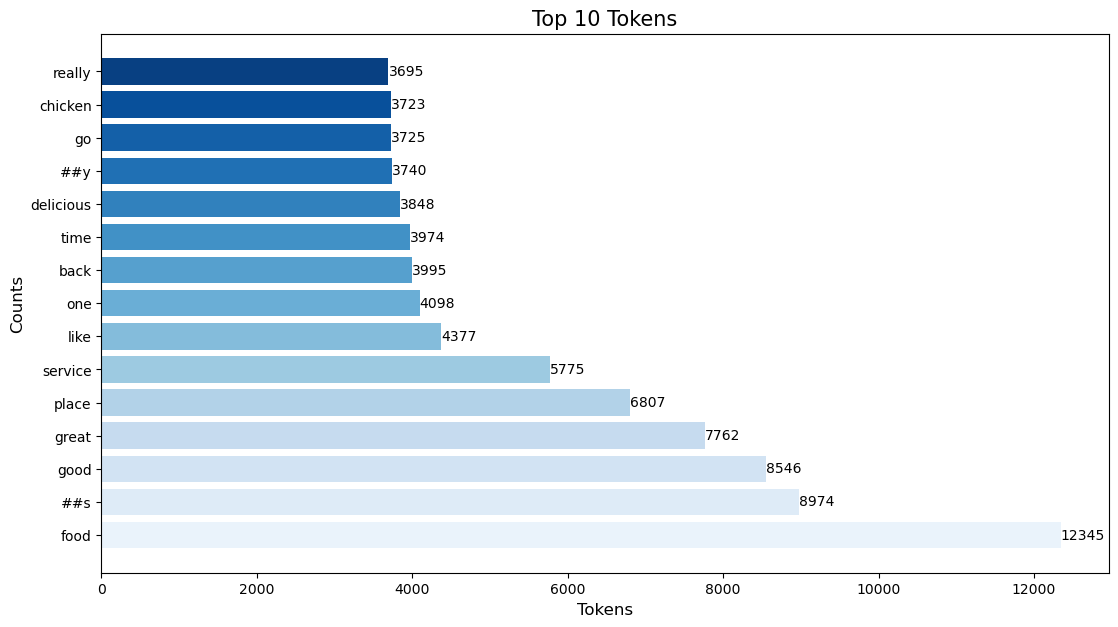

In [10]:
fig, ax = plt.subplots(figsize=(13,7))
print(tokensDict)
P1 = ax.barh(list(tokensDict.keys()), list(tokensDict.values()), color=sns.color_palette("Blues", 15))
ax.bar_label(P1)
ax.set_title("Top 10 Tokens", fontsize=15)
ax.set_xlabel("Tokens",fontsize=12)
ax.set_ylabel("Counts",fontsize=12)
plt.show()

{'really': 3695, 'chicken': 3723, 'go': 3725, '##y': 3740, 'delicious': 3848, 'time': 3974, 'back': 3995, 'one': 4098, 'like': 4377, 'service': 5775, 'place': 6807, 'great': 7762, 'good': 8546, '##s': 8974, 'food': 12345}


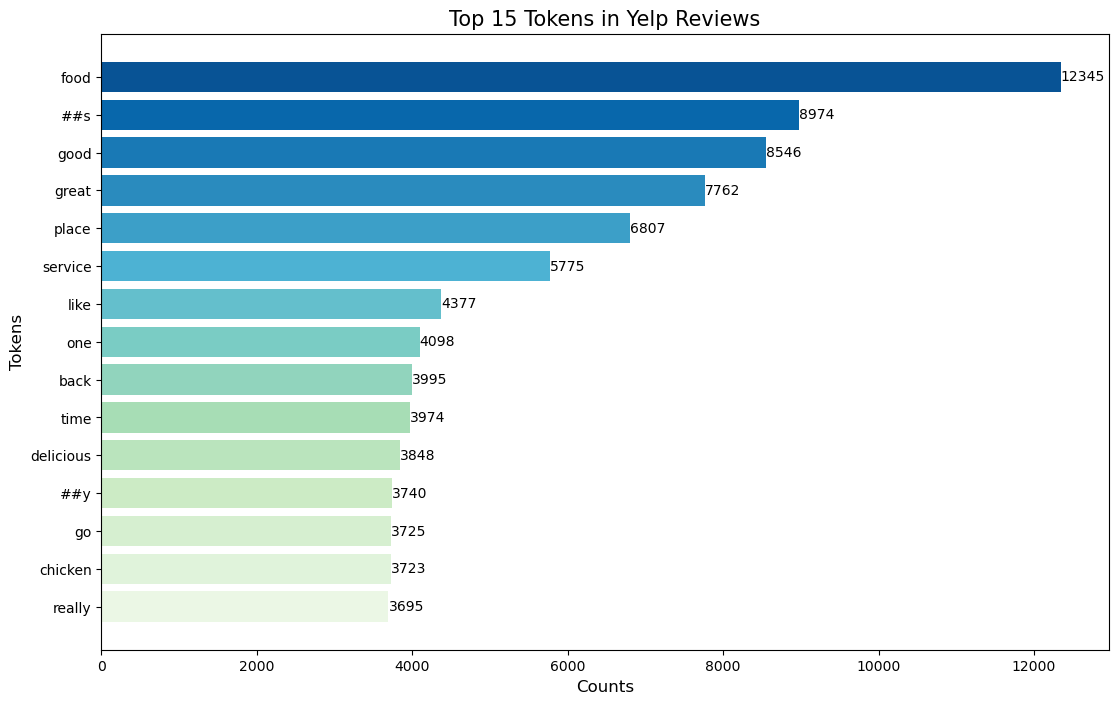

In [11]:
fig, ax = plt.subplots(figsize=(13,8))

# Sort the dictionary by values in descending order
tokensDict = dict(sorted(tokensDict.items(), key=lambda x: x[1]))
print(tokensDict)

# Create the horizontal bar plot
P1 = ax.barh(list(tokensDict.keys()), list(tokensDict.values()), color=sns.color_palette("GnBu", 15))

# Add labels to the bars
ax.bar_label(P1)

# Set plot title and axis labels
ax.set_title("Top 15 Tokens in Yelp Reviews", fontsize=15)
ax.set_xlabel("Counts", fontsize=12)
ax.set_ylabel("Tokens", fontsize=12)

plt.show()

In [27]:
df2 = pd.read_csv("/Users/joanna/Downloads/Final_v1.csv")
df2.head(10)

,population,review_count,restaurant_count,income,time_label,food_label,serv_label,env_label,sum_check_in
0,72441,24,90,69551,0.0000,0.8333,0.4167,0.3750,6.60
1,134499,14,86,102100,-0.3571,0.7143,-0.0714,0.0714,2.52
2,37557,36,127,169616,0.1389,0.9167,0.3333,0.1389,9.60
3,56496,38,92,130265,-0.0526,0.3684,-0.0789,-0.0526,11.18
4,159651,7,266,67100,0.0000,0.2857,0.5714,-0.2857,17.64
5,86475,175,104,202968,-0.0686,0.5486,0.1714,0.3371,17.12
6,60870,28,76,127189,0.0714,0.9643,0.2500,0.0714,4.87
7,37686,18,28,154253,-0.3333,0.7778,0.2222,0.1667,3.06
8,171258,14,163,105296,-0.1429,0.7143,0.0714,0.2143,7.43
9,172563,17,252,77812,0.0000,0.7647,0.3529,0.0588,1.96


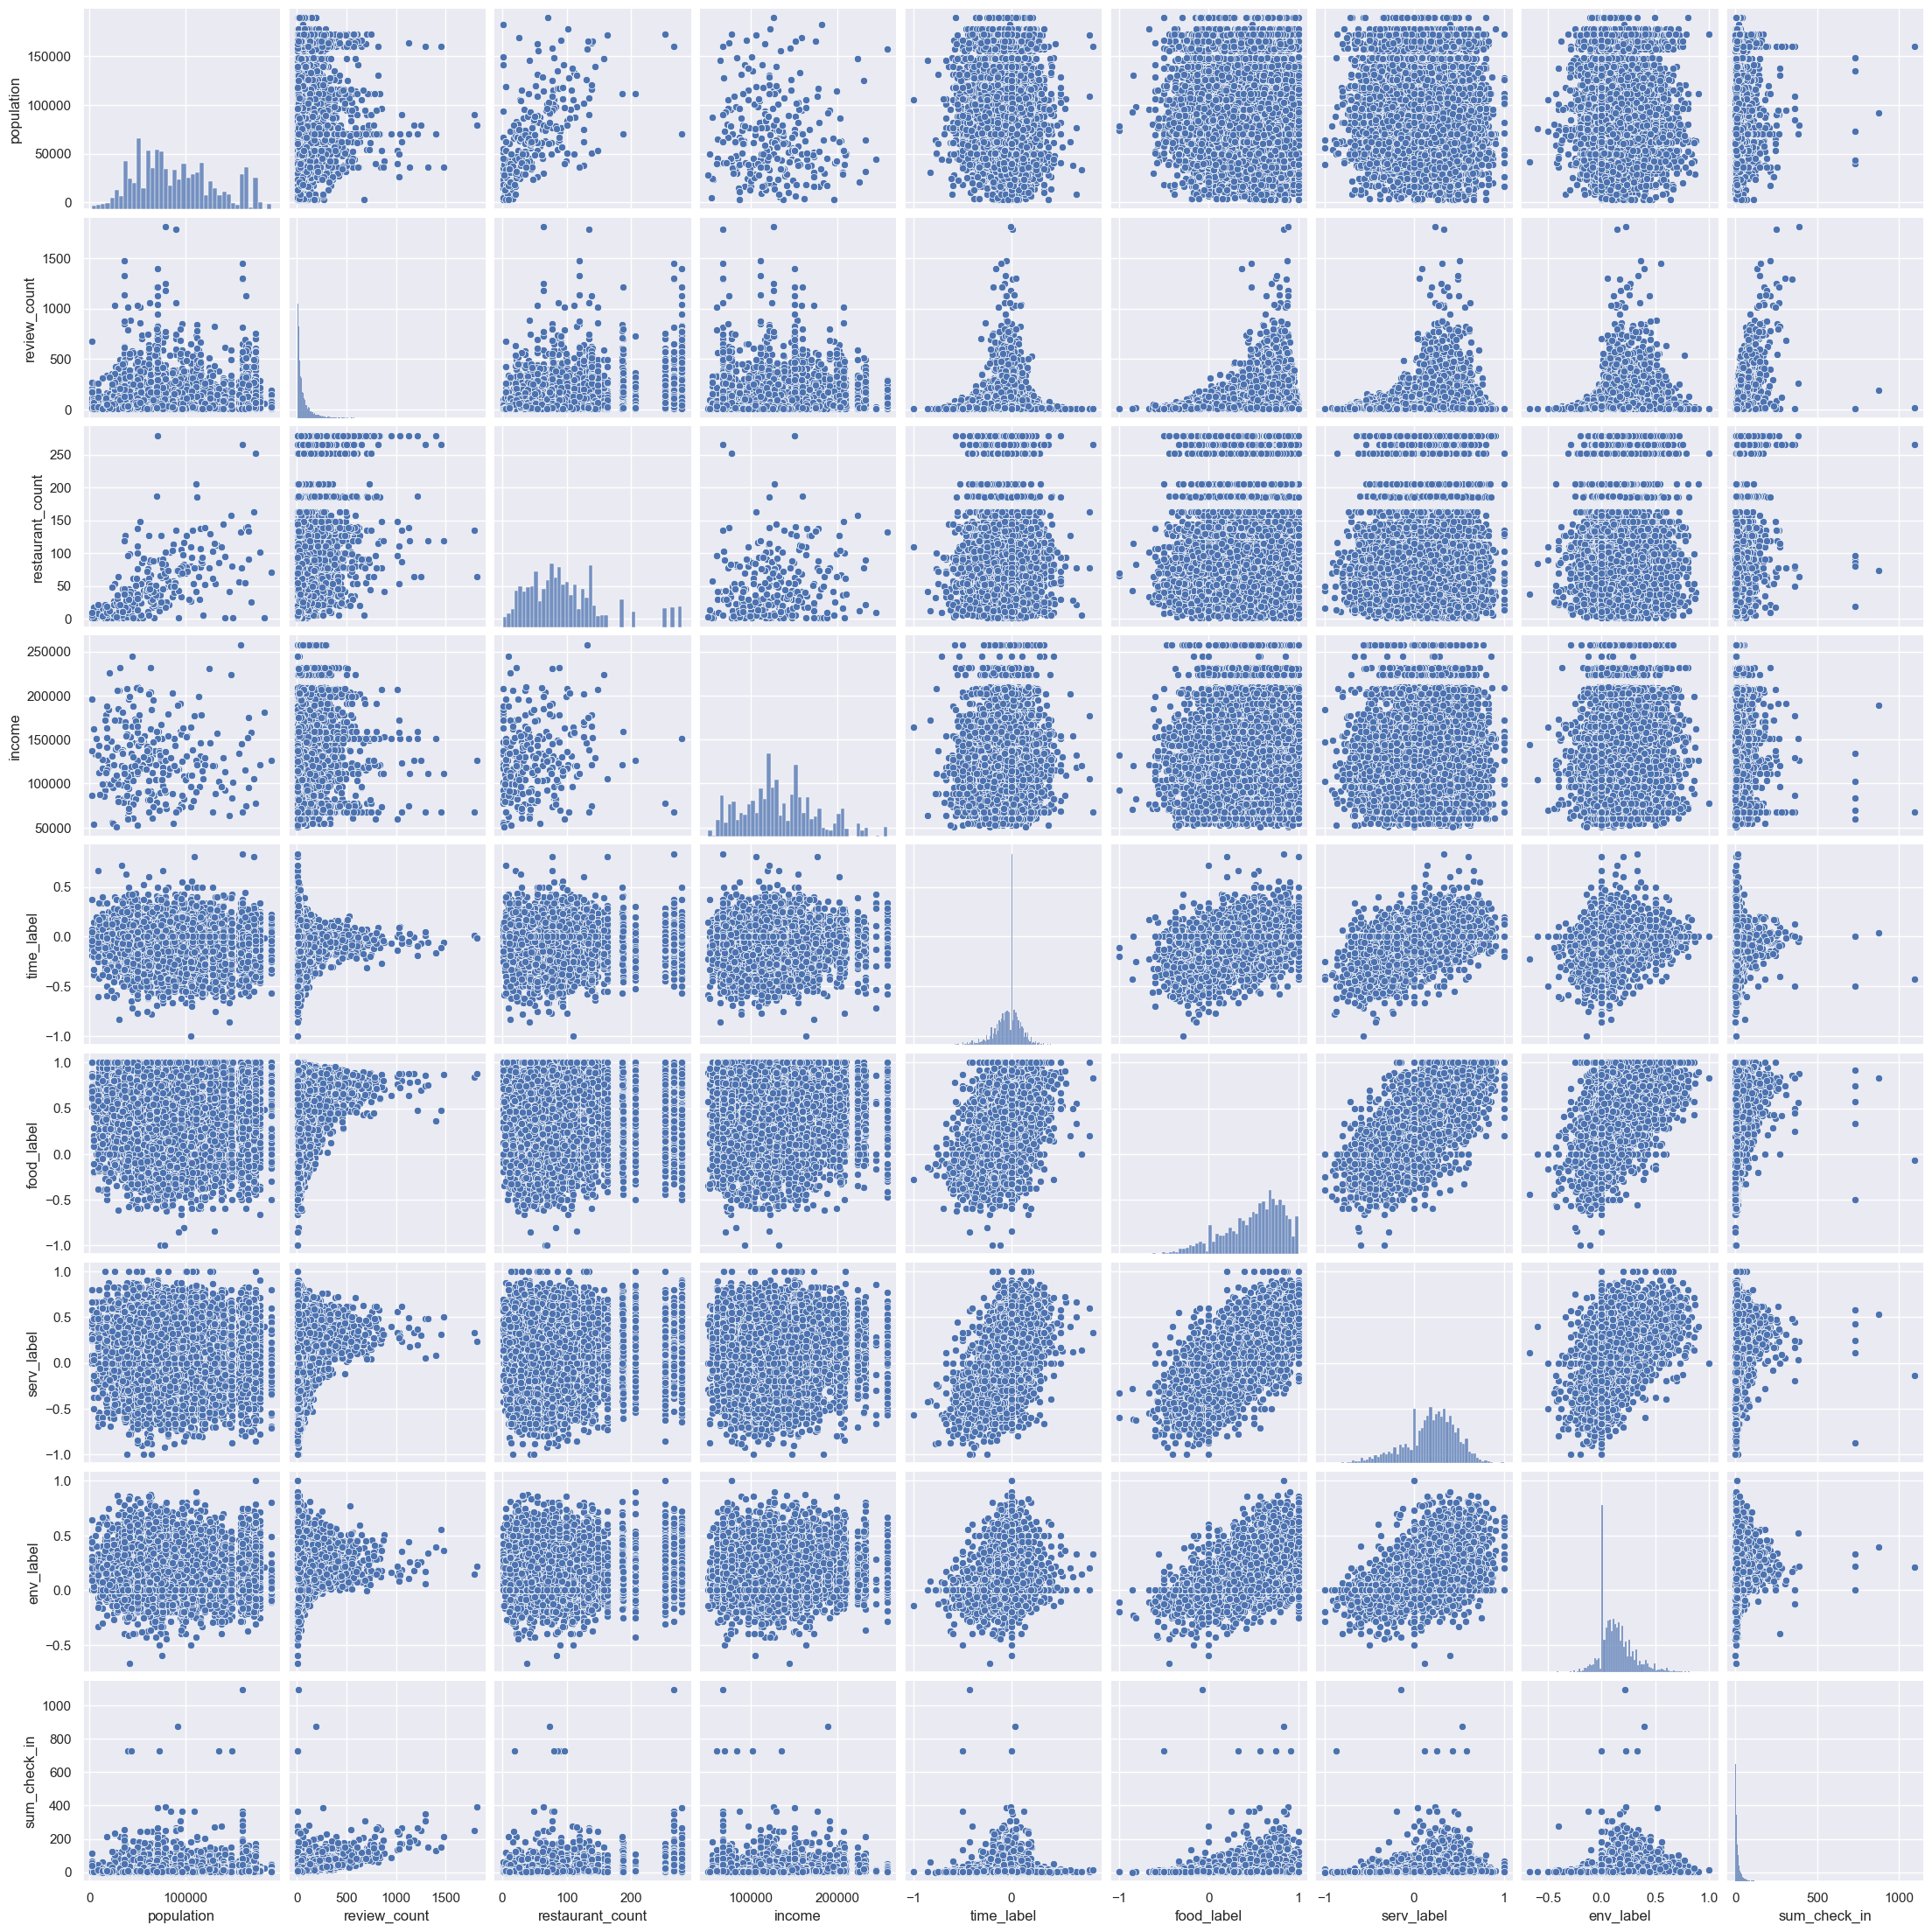

In [28]:
sns.pairplot(df2)
plt.show()

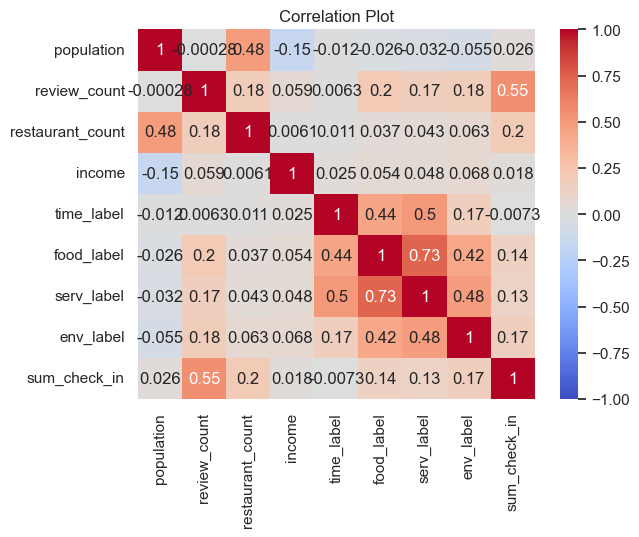

In [29]:
# Calculate the correlation matrix
corr_matrix = df2.corr()

# Plot the correlation matrix as a heatmap
#sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Plot')
plt.show()